University of Helsinki, Master's Programme in Data Science  
DATA20046 Neural Networks and Deep Learning - Spring 2025  
Arto Klami, Aapo Hyvärinen  

# Problem Set 1: Introduction

## Basic definitions (34 pts)

### Mathematical exercises (16 pts)

1. (8 pts) One proposal as activation function is the **"leaky ReLU"**: $$\psi(x) = \begin{cases} x, & \text{if } x \geq 0 \\  \alpha x, & \text{if } x < 0 \end{cases}$$ For some constant $0 \leq \alpha \leq 1$, typically small.

     - (a) Show that the basic ReLU is a special case of this.
     - (b) Show that the linear activation function is also a special case.
     - (c) Show that the leaky ReLU can also be expressed as: $$\psi(x) = \max(\alpha x, x)$$

---

- (a) If we set $\alpha = 0$ we obtain the basic ReLU function $$ReLU(x) = \begin{cases} x, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$$
- (b) If we set $\alpha = 1$ we obtain the linear function $$f(x) = \begin{cases} x, & \text{if } x \geq 0 \\ x, & \text{if } x < 0 \end{cases}$$
- (c) If we consider $x \geq 0$ we obtain $\max(\alpha x, x) = x$ since $0 \leq \alpha \lt 1$ can only decrease the value of $\alpha x$ compared to $x$, on the other hand if we consider $x \lt 0$ we obtain $\max(\alpha x, x) = \alpha x$ for the same reasoning. In the case in which $\alpha = 1$ we trivially obtain $\max(\alpha x, x) = x = \alpha x$.

---

1. (8 pts) Take a multi-layer neural network with linear activation function: $$y_K = W_K W_{K-1} \ldots W_2 W_1 x = M x =: g(x)$$ where the total function given by the NN is denoted by $g$.

	- (a) Suppose we know that $W_1$ is of size $m \times n$. What kind of constraint does this imply on the size of $W_2$?
	- (b) Suppose again that we know that W1 is of size $m \times n$. What is a necessary condition on $m,n$ to make it possible that the neural
network is injective (also called invertible in NN literature), meaning that for any output y you can compute the original x. (A non-rigorous answer is fine.)
	- (c) Assume that all matrices $W_i$ are square (same number of rows and columns). In the case of an arbitrary number of layers, give a necessary and sufficient condition on the $W_i$ such that this $g$ is injective.

---

- (a) Since $W_1 \in \mathbb{R}^{m \times n}$ (m = rows, n = cols) then $x \in \mathbb{R}^{n}$ and $W_1 x = y$ where $y \in \mathbb{R}^{m}$. So in order for the multiplication $W_2 y = z$ to work we need that $W_2 \in \mathbb{R}^{q \times m}$.
- (b) In order for the neural network to be invertible we need the matrix to be invertible, so that we can have $x = W_1^{-1} y$. For a matrix to be invertible it should satisfy $m = n$, e.g. $W_1 \in \mathbb{R}^{m \times m}$. It should be mentioned that the injective property is also satisfied in the case where the matrix achieves full column rank and $m \gt n$ but in which case only the pseudo-inverse is permitted.  
- (c) Assuming that all matrices $W_i$ are square the sufficient condition for matrix inversion is that they should be non singular, in other words their deteriminant should be non zero, $|W_i| \ne 0$.

### Computer assignments (18 pts)

1. (9 pts) Construct a neural network using PyTorch. As architecture, take a fully connected neural network with three layers of weights, and five neurons in each layer. (Thus, the input and the output are also 5-dimensional.) Try out the tanh, ReLU, and linear activation functions, always the same activation everywhere in the NN.
2. (9 pts) Create three sets of random weight vectors (for different plots to be made). Plot y1, that is the first entry of the output vector, as a function of x1 from −10.0 to 10.0, when all the other xi,i > 1 are fixed to random values. Report three plots (corresponding to the three sets of random
weights) for each of the three activation functions; in total, nine plots.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### (1)

In [ ]:
activation_function_list = [nn.ReLU(), nn.Tanh(), nn.LeakyReLU(negative_slope = 1)]
activation_function_names = ["ReLU", "tanh", "linear"]
neural_network = None
for activation_function in activation_function_list:
    neural_network = nn.Sequential(
		nn.Linear(5, 5, bias = False)
		,activation_function
		,nn.Linear(5, 5, bias = False)
		,activation_function
		,nn.Linear(5, 5, bias = False)
		,activation_function
	)

#### (2)

In [ ]:
torch.manual_seed(0)

In [46]:
weight_sets = [
	[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
]

x = torch.linspace(-10, 10, 1000)
x_rest = torch.rand(4)
results = torch.empty(len(activation_function_list), len(weight_sets), x.size(dim=0))

In [ ]:
print(f"Visualizing random weights")
for i, weight_set in enumerate(weight_sets):
	print(f"Weight Set {i + 1}:")
	for j, weights in enumerate(weight_set):
		print(f"Layer {j + 1} Weights:\n{weights.numpy()}\n")

Visualizing random weights
Weight Set 1:
Layer 1 Weights:
[[0.6225418  0.36847812 0.8823178  0.5834557  0.09108943]
 [0.11962289 0.23941821 0.7394386  0.17717719 0.27126354]
 [0.5907748  0.15335107 0.25378734 0.95339257 0.23565316]
 [0.33341414 0.8576003  0.61204207 0.8924498  0.05950505]
 [0.74992275 0.42352104 0.17967683 0.28585178 0.01636291]]

Layer 2 Weights:
[[0.8458876  0.4040594  0.00972778 0.9276083  0.82385266]
 [0.70674133 0.98936516 0.95152706 0.96727926 0.9477628 ]
 [0.9063387  0.63089454 0.4581272  0.51901466 0.29221117]
 [0.73492885 0.5144853  0.617963   0.17792618 0.31173575]
 [0.87485135 0.5486307  0.6725459  0.06349629 0.28588694]]

Layer 3 Weights:
[[0.4872747  0.44753224 0.81917244 0.34910762 0.9172987 ]
 [0.4032961  0.69447446 0.147986   0.5848667  0.01253152]
 [0.0710057  0.17999738 0.63997847 0.5387535  0.54839224]
 [0.44530576 0.9201248  0.98980004 0.7123442  0.8976275 ]
 [0.475289   0.3161841  0.5972046  0.8287679  0.4227242 ]]

Weight Set 2:
Layer 1 Weights:
[

In [ ]:
with torch.no_grad():
	for function_idx, activation_function in enumerate(activation_function_list):
		neural_network = nn.Sequential(
			nn.Linear(5, 5, bias = False) 	# 1 layer (idx 0)
			,activation_function			# 2 layer (idx 1)
			,nn.Linear(5, 5, bias = False)	# 3 layer (idx 2)
			,activation_function			# 4 layer
			,nn.Linear(5, 5, bias = False)	# 5 layer
			,activation_function			# 6 layer
		)
		for weight_idx, weight_set in enumerate(weight_sets):
			neural_network[0].weight.copy_(weight_set[0])
			neural_network[2].weight.copy_(weight_set[1])
			neural_network[4].weight.copy_(weight_set[2])
			for idx, x_i in enumerate(x):
				input = torch.cat( (x_i.reshape(1), x_rest), dim = -1 )
				results[function_idx][weight_idx][idx] = neural_network(input)[0]

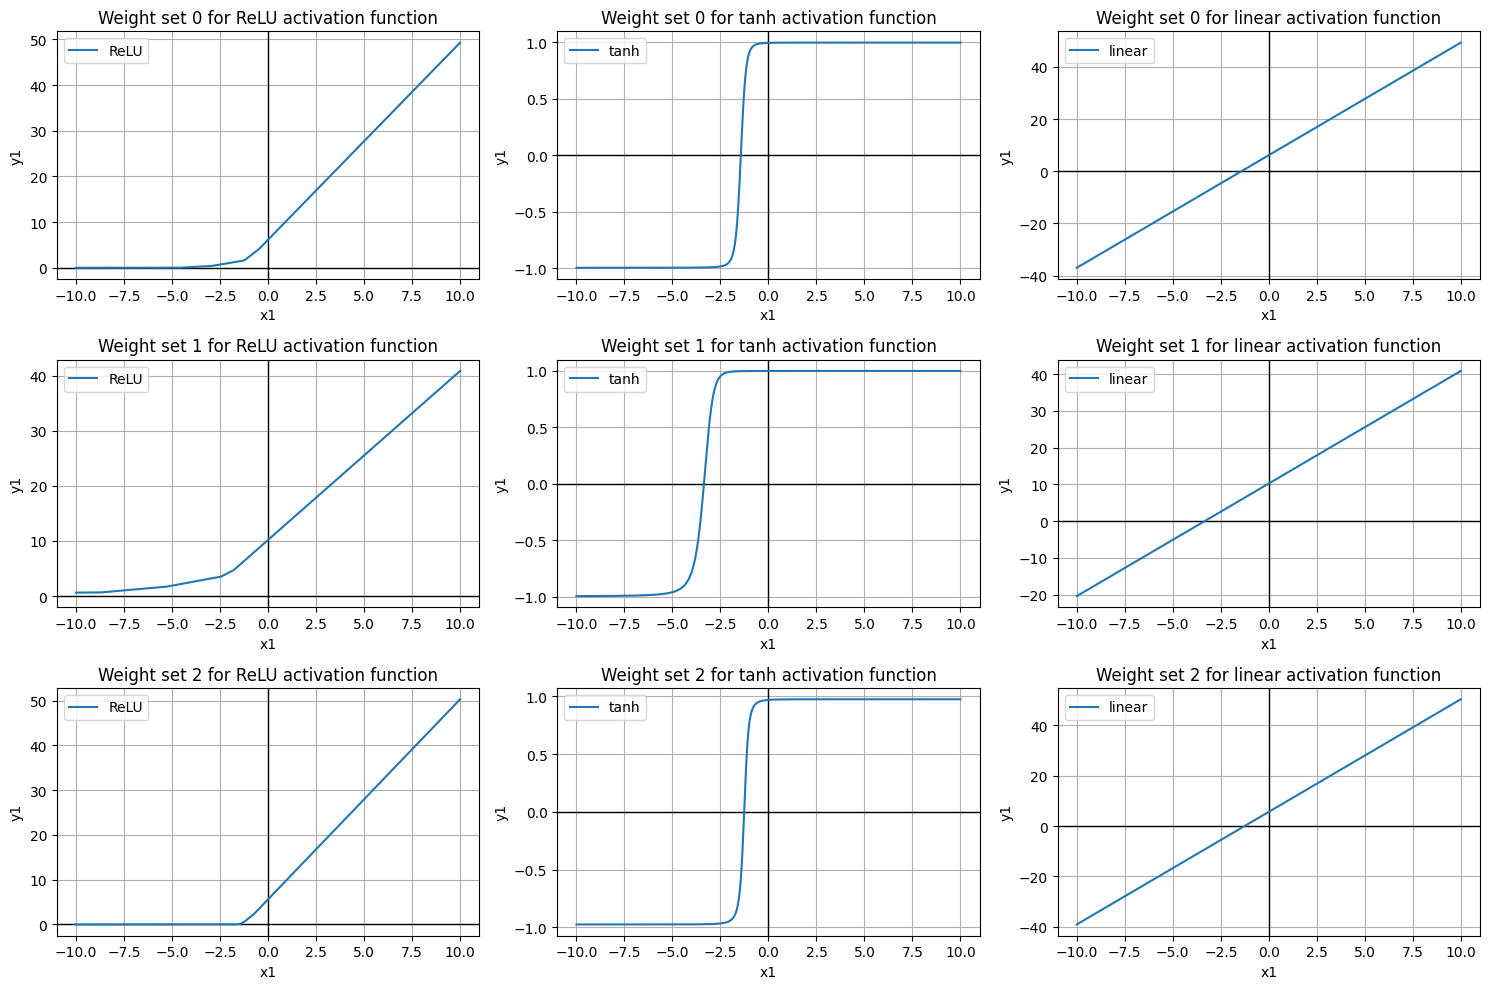

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3):
	for j in range(3):
		axs[i, j].grid()
		axs[i, j].axhline(linewidth = 1, color = "black")
		axs[i, j].axvline(linewidth = 1, color = "black")
		axs[i, j].plot(x, results[j][i], label = f"{activation_function_names[j]}")
		axs[i, j].set_title(f"Weight set {i} for {activation_function_names[j]} activation function")
		axs[i, j].set_xlabel('x1')
		axs[i, j].set_ylabel('y1')
		axs[i, j].legend()
plt.tight_layout()
plt.show()

##### Final considerations 

As we can see from the figures above the different sets of weights have a very perceivable effect on the final output. Although the plots are very similar which implies that the activation function has a much more significant impact on the input, the different sets of weights make the same function behave differently, so much so that we can visibly see the differences in the different plots (eg. left tail of ReLU can either have a smooth or steep transition to 0). 

## Optimization (66 pts + 2 bonus pts)

### Mathematical exercises (38 pts + 2 bonus pts)

In the following exercises, when the exercise says “calculate”, it means you should show the detailed derivation. We denote by w an n-dimensional vector.
1. (7 pts) Calculate the gradient of the function $f_1(w) = ||w||^2$. 
 
 	Hint: write out the function so that you express it as a function of the individual entries $w_i$; then take the partial derivatives as in the definition of a gradient.

2. (7 pts) Calculate the Hessian of the function $f_1(w) = ||w||^2$. 
   		
	Hint: start from the result of the preceding.

3. (7 pts) Derive Newton’s method for optimizing $f_1(w) = ||w||^2$. It works incredibly well; why?

4. (7 pts) Calculate the gradient of the function $f_0(w) = w^T z$ for some fixed vector $z$.

5. (5 pts) Calculate the gradient of the function $$f_2(w) = g(w^T z)$$ for some fixed (non-stochastic) vector $z$. Here, $g$ is some differentiable function $\mathbb{R} \to \mathbb{R}$. 

	Hint: as always, write out the dot-product so you have the function of the individual entries $w_i$.

6. (5 pts) Calculate the stochastic gradient of the function $$f_3(w) = \mathbb{E}[g(w^T z)]$$ for some *random* vector $z$.

7. (2 bonus pts) A couple of short bonus questions, possibly fun, on gradients. Here, the point is to further illustrate how the calculation of the gradients obeys formally similar rules as elementary univariate derivatives. In these bonus questions, don’t make any detailed calculations, just use common sense and pay attention to the dimension of the result; no justification needed for your answer.
	- (a) We know that the derivative of $\frac{1}{2} ax^2$ is $ax$. Which of the following is the gradient of $f(w) = \frac{1}{2} w^T Mw$ where $M$ is some symmetric matrix?
		- i. $M$
		- ii. $w^T M$
		- iii. $M w$
		- iv. $M w^T$
    - (b) We know that the derivative of $\frac{1}{4} x^4$ is $x^3$. Which of the following is the gradient of $f(w) = \frac{1}{4} ||w||^4$?
		- i. $w w w$
		- ii. $w^T w w^T$
		- iii. $||w||^2 w$
		- iv. $||w||^3$ 

---

1. $f_1(w) = ||w||^2 = {\biggr(\sqrt{w_1^2+w_2^2+ \ldots +w_{n-1}^2+w_n^2}\biggr)}^2$ with $w \in \mathbb{R}^{n}$ can be rewritten as $f_1(w) = g(w)^2 = h(g(w))$. The gradient of $f_1(w)$ is $$\nabla{f_1(w)} = \begin{bmatrix}\frac{\partial f_1}{\partial w_1} \\ \frac{\partial f_1}{\partial w_2} \\ \vdots \\ \frac{\partial f_1}{\partial w_{n-1}} \\ \frac{\partial f_1}{\partial w_n}\end{bmatrix}$$

If we consider the first element we can write $$\frac{\partial f_1}{\partial w_1} = \frac{\partial h(g(w))}{\partial w_1} = \frac{\partial h(g(w))}{\partial g(w)} \cdot \frac{\partial g(w)}{\partial w_1} = h^\prime(g(w)) \cdot g^\prime(w) = 2 \cdot ||w|| \cdot (||w||)^\prime$$

Now we have to solve $\frac{\partial g(w)}{\partial w_1} = (||w||)^\prime$: $$\frac{\partial g(w)}{\partial w_1} = \frac{\partial ||w||}{\partial w_1} = \frac{\partial {\biggr(\sqrt{w_1^2+w_2^2+ \ldots +w_{n-1}^2+w_n^2}\biggr)}}{\partial w_1}$$

Here once again we have a composition of functions so we again use the chain rule from above and we remember that the derivative of the square root is $\frac{\partial \sqrt{x}}{\partial x} = \frac{1}{2 \cdot \sqrt{x}}$ so we obtain $$\begin{align*}\frac{\partial \left( \sqrt{w_1^2 + w_2^2 + \ldots + w_{n-1}^2 + w_n^2} \right)}{\partial w_1} &= \frac{1}{2||w||} \cdot \frac{\partial \left( w_1^2 + w_2^2 + \ldots + w_n^2 \right)}{\partial w_1} \\ &= \frac{1}{2||w||} \cdot \left( \frac{\partial w_1^2}{\partial w_1} + \frac{\partial w_2^2}{\partial w_1} + \ldots + \frac{\partial w_n^2}{\partial w_1} \right) \\ &= \frac{1}{2||w||} \cdot 2w_1. \end{align*}$$ since the derivative of the sum of squares is 0 for all $w_i$ that are not $w_1$ and the derivative of $w_1^2$ is $2w_1$

Putting everything together we obtain $$\frac{\partial f_1}{\partial w_1} = 2||w|| \cdot \frac{1}{2||w||} \cdot 2w_1 = 2w_1$$

Since the only time we derived w.r.t $w_1$ was during the derivation of the sum of squares we can be certain that the derivation process w.r.t the other variables is similar resulting in $$\nabla{f_1(w)} = \begin{bmatrix} 2w_1 \\ 2w_2 \\ \vdots \\ 2w_{n-1} \\ 2w_n\end{bmatrix}$$

2. The hessian matrix is defined as $$H_f(x) = \begin{bmatrix}\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix}$$

Starting from the previous exercise's result we can easily derive the diagonal entries of the matrix $$\frac{\partial^2 f_1}{\partial^2 w_i^2} = 2$$

Then we can notice for each row we have to derive the result of the previous exercise by the $w$ whose pedix is the row number, e.g. for the i-th row we derive $\nabla{f_1(w)}$ by $w_i$. But the derivative for any entry of $\nabla{f_1(w)}$ that is not $w_i$ will result in the value of 0 since $w_i$ is not present.

Therefore the final result becomes $$H_{f_1(w)} = \begin{bmatrix}2 & 0 & \cdots & 0 \\ 0 & 2 & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 2 \end{bmatrix}$$

3. The newton method's update rule is the following: $$w_{k+1} = w_k + \Delta{w}$$ where $$\Delta{w} = - H_{f_1(w_k)}^{-1} \nabla f(w_k)$$

4. The function $f_0(w) = w^T z$ can be expressed as $f_0(w) = w_1 \cdot z_1 + w_2 \cdot z_2+ \ldots + w_{n-1} \cdot z_{n-1} + w_n \cdot z_n$. The gradient of the function can be expressed as $$\nabla{f_0(w)} = \begin{bmatrix}\frac{\partial f_0}{\partial w_1} \\ \frac{\partial f_0}{\partial w_2} \\ \vdots \\ \frac{\partial f_0}{\partial w_{n-1}} \\ \frac{\partial f_0}{\partial w_n}\end{bmatrix}$$

If we consider the first element of $\nabla{f_0(w)}$, that is $\frac{\partial f_0}{\partial w_1}$ we obtain $$\frac{\partial (w_1 \cdot z_1 + w_2 \cdot z_2+ \ldots + w_{n-1} \cdot z_{n-1} + w_n \cdot z_n)}{\partial w_1} = \frac{\partial (w_1 \cdot z_1)}{\partial w_1} + \frac{\partial (w_2 \cdot z_2)}{\partial w_1}+ \ldots + \frac{\partial (w_{n-1} \cdot z_{n-1})}{\partial w_1} + \frac{\partial (w_n \cdot z_n)}{\partial w_1}$$

Since $z$ is constant we obtain $\frac{\partial (w_1 \cdot z_1)}{\partial w_1} = z_1$ and $\frac{\partial (w_i \cdot z_i)}{\partial w_1} = 0 \ \forall w_i \ne w_1$.

The same reasoning is applied to all other $w_i$ yielding $$\nabla{f_0(w)} = \begin{bmatrix}z_1 \\ z_2 \\ \vdots \\ z_{n-1} \\ z_n\end{bmatrix}$$


5. The function $f_2(w) = g(w^T z)$ can be expressed as $f_2(w) = g(f_0(w))$ and the gradient is $$\nabla{f_2(w)} = \begin{bmatrix}\frac{\partial f_2}{\partial w_1} \\ \frac{\partial f_2}{\partial w_2} \\ \vdots \\ \frac{\partial f_2}{\partial w_{n-1}} \\ \frac{\partial f_2}{\partial w_n}\end{bmatrix}$$

If we consider the first element of the gradient we obtain $$\frac{\partial f_2}{\partial w_1} = \frac{\partial g(f_0(w))}{\partial w_1} = \frac{\partial g(f_0(w))}{\partial f_0(w)} \cdot \frac{\partial f_0(w)}{\partial w_1} = g^\prime(f_0(w)) \cdot f_0^\prime(w) = g^\prime(w^T z) \cdot z_1$$

The same reasoning is applied to all other $w_i$ yielding $$\nabla{f_2(w)} = \begin{bmatrix}g^\prime(w^T z) \cdot z_1 \\ g^\prime(w^T z) \cdot z_2 \\ \vdots \\ g^\prime(w^T z) \cdot z_{n-1} \\ g^\prime(w^T z) \cdot z_n\end{bmatrix}$$

6. The gradient of the function $f_3(w) = \mathbb{E}[g(w^T z)]$ can be expressed as $$\nabla{f_3(w)} = \nabla{\mathbb{E}[g(w^T z)]} = \mathbb{E}[\nabla{g(w^T z)}] = \mathbb{E}[\nabla{f_2(w)}] = \mathbb{E}[{g^\prime(w^T z) \cdot z}]$$

This exchange of operators gradient $\nabla$ and expected value $\mathbb{E}$ can be done only under certain conditions:
	
   1. $g(w^T z)$ needs to be a differentiable function, which is already satisfied 
   2. The expectation $\mathbb{E}[\nabla{f_2(w)}]$ is well defined and bounded, which is a condition that should be proved

### Computer assignments (28 pts)

You should do the calculations of the gradients by hand and implement them in numpy.

#### 1. 

Consider the function $f : \mathbb{R}^2 \to \mathbb{R}$: $$f(w) = exp(−w_1^2−2(w_2−1)^2) + exp(−(w_1−1)^2−2w_2^2)$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

##### (a)
To begin with, plot the isocontours of the function f (use your implementation of $f(w)$, which takes in an array and output a scalar)

In [1]:
def f(w):
    w1 = w[0]
    w2 = w[1]
    return np.exp(-w1**2 - 2 * (w2 - 1)**2) + np.exp(-(w1 - 1)**2 - 2*w2**2)

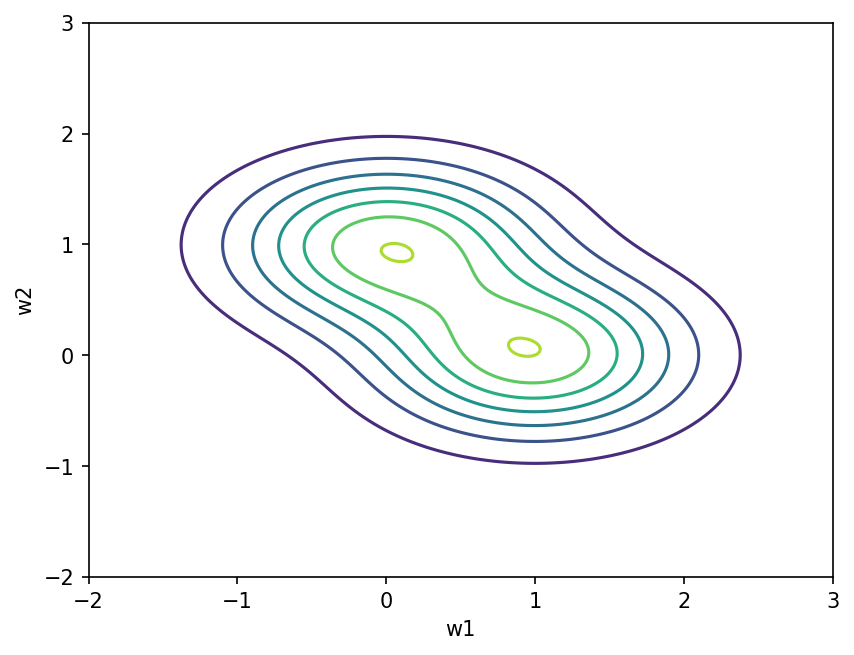

In [ ]:
# Code for plotting isocontours of the function f
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150)
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

##### (b)
Calculate the gradient of $f(w)$

**your solution here**

In [8]:
def f_prime(w):
    w1 = w[0]
    w2 = w[1]
    return np.array([
        -2 * w1 * np.exp( -w1**2-2*(w2-1)**2 ) -2*(w1-1)*np.exp( -(w1-1)**2-2*w2**2 )
		,-4 * w2 * np.exp( -2*w2**2-(w1-1)**2 ) -4*(w2-1)*np.exp(-2*(w2-1)**2-w1**2)
    ])

##### (c)
Maximize this with the gradient method. Start with three “random” initial points which we define here as $(0.2,0.5),(0.5,0.2),(1.0,1.0)$ for convenience. Note: You have to try different step sizes to find a good one. 

(Hint: you may have to try wildly different step sizes of completely different magnitudes to find a good one). 

Use some stopping criterion given in the lecture material; as the threshold something like $10^{−4}$ might work well.

In [19]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

iterations_list = []
step_size = 0.0001
iterations = 0
treshold = 0.0000001
weight_1_trajectory = [w1]
while True:
	w1_step = w1 + step_size * f_prime(w1)
	weight_1_trajectory.append(w1_step)
	if np.all(w1_step - w1 < treshold): break
	else: 
		w1 = w1_step
		iterations += 1
	

print(f"iterations for w1: {iterations}")
iterations_list.append(iterations)
iterations = 0
weight_2_trajectory = [w2]

while True:
	w2_step = w2 + step_size * f_prime(w2)
	weight_2_trajectory.append(w2_step)
	if np.all(w2_step - w2 < treshold): break
	else: 
		w2 = w2_step
		iterations += 1
print(f"iterations for w2: {iterations}")
iterations_list.append(iterations)
iterations = 0
weight_3_trajectory = [w3]

while True:
	w3_step = w3 + step_size * f_prime(w3)
	weight_3_trajectory.append(w3_step)

	if np.all(np.abs(w3_step - w3) < treshold): break
	else: 
		w3 = w3_step
		iterations += 1
print(f"iterations for w3: {iterations}")
iterations_list.append(iterations)

print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")

iterations for w1: 37519
iterations for w2: 43552
iterations for w3: 53561
w1: [0.07229609 0.92867772]
w2: [0.92866691 0.07095076]
w3: [0.07133312 0.92904911]


##### (d)
Plot the trajectories for the three runs corresponding to the three
initial points above, using the best step size you found (doesn’t have
to be the the same for all initial points). More precisely, show the
points wi on the 2D plane where i is the iteration count. Joining the
points for each run using ax . arrow ( x , y , dx , dy ,
l e n g t h i n c l u d e s h e a d=True , wid th = 0 . 0 3 )
for better visualization. (Note: the above command draws an arrow
from (x,y) to (x + dx,y + dy); replace them with the correct vari-
ables.) Report One figure with all the three trajectory plots side
by side. Each subplot corresponds to an initial point. Overlay the
optimization trajectory on the contour plot of f from (a).

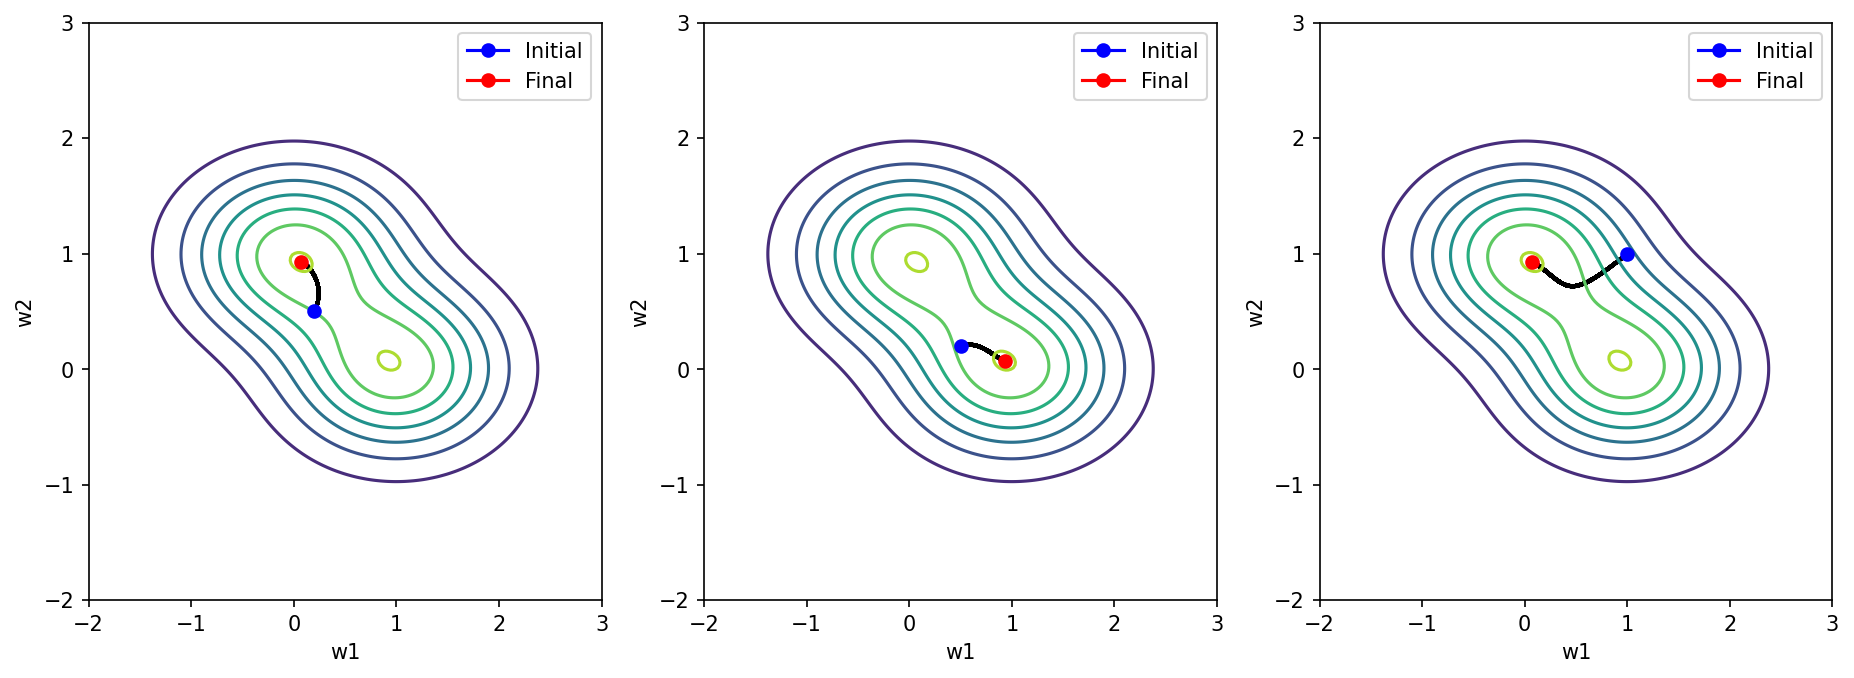

In [16]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

trajectories = [weight_1_trajectory, weight_2_trajectory, weight_3_trajectory]
# Code for plotting.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
for i, weight in enumerate([w1, w2, w3]):
    ax = axes[i]
    ax.contour(W1, W2, Fs)
    ax.plot(weight[0], weight[1], marker="o", color="blue", label="Initial")
    trajectory = trajectories[i]
    for j in range(1, len(trajectory)):
        x, y = trajectory[j]
        dx, dy = trajectory[j] - trajectory[j-1]
        ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.003)
    ax.plot(trajectory[-1][0], trajectory[-1][1], marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
plt.show()

##### (e)
Plot the objective function $f(w)$ as a function of iteration count. Report one figure in which all the three curves are shown side by side.

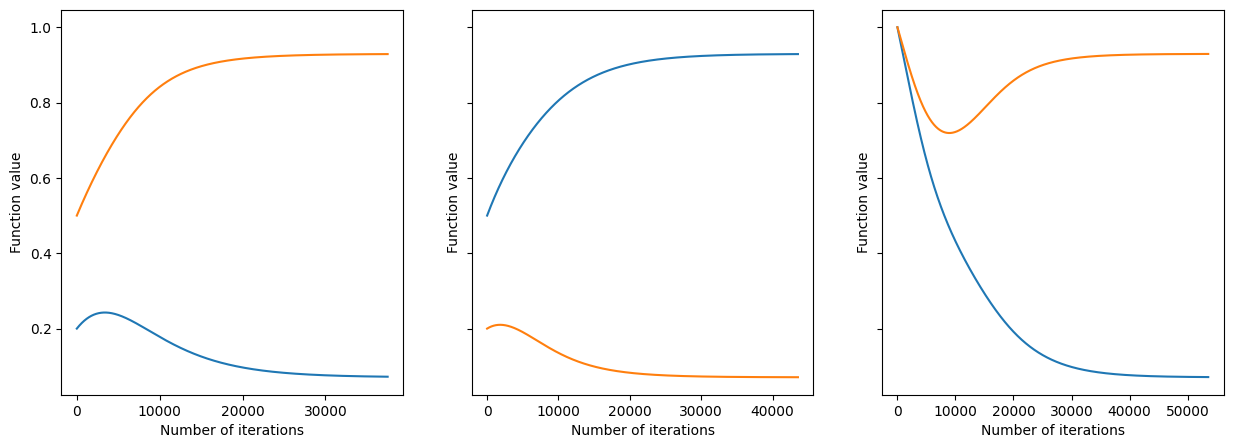

In [27]:
# Code for plotting.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, (w, iterations) in enumerate(zip(trajectories, iterations_list)):
    axs[i].plot(w)
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
plt.show()

##### (f)
Report a brief discussion on: What can you conclude from the above in terms of local vs. global maxima?

**your solution here**